In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("Boston Dataset.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.shape

(506, 15)

In [4]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# get rid of the redundant columns
df.drop(columns=['Unnamed: 0','rad'],axis=1,inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


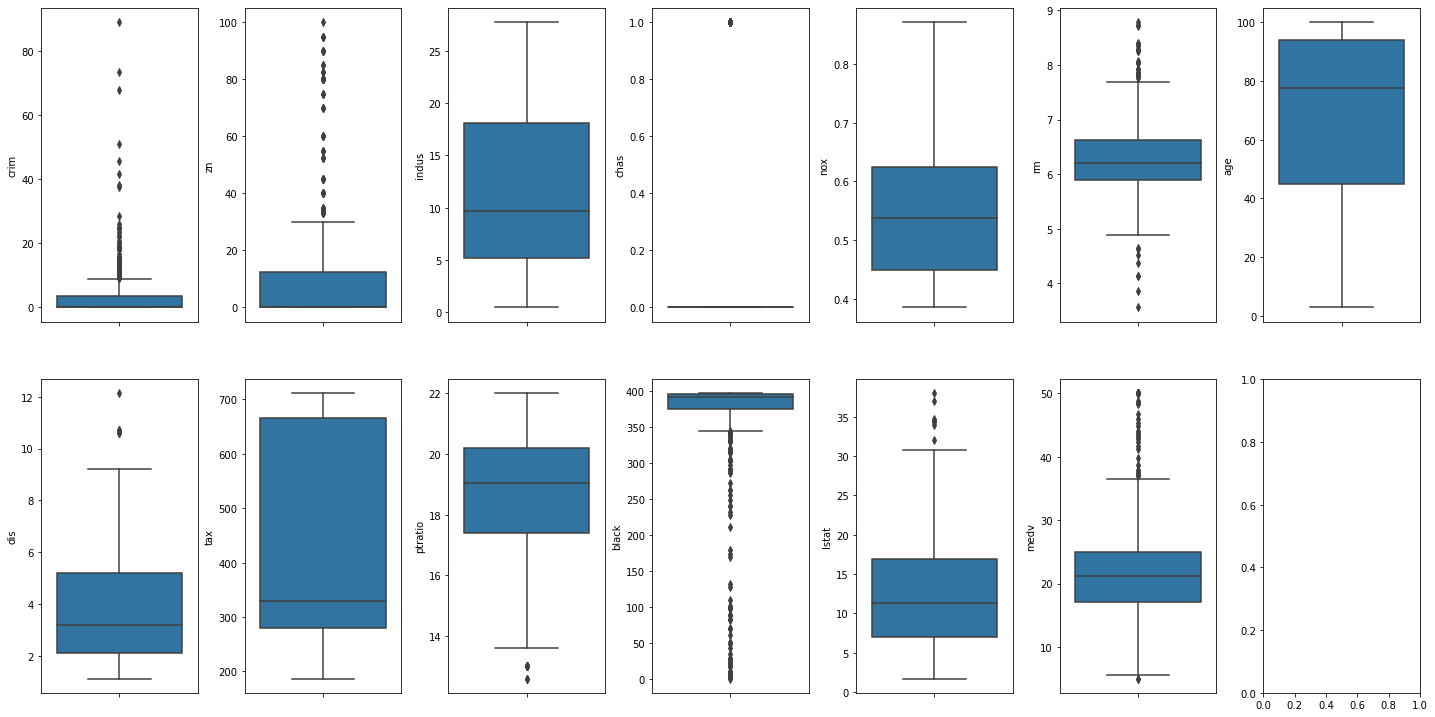

In [6]:
# visualize data use sns.boxplot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.8, w_pad=0.7, h_pad=5.0)

C:\Users\jiang\Anaconda3\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jiang\Anaconda3\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jiang\Anaconda3\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

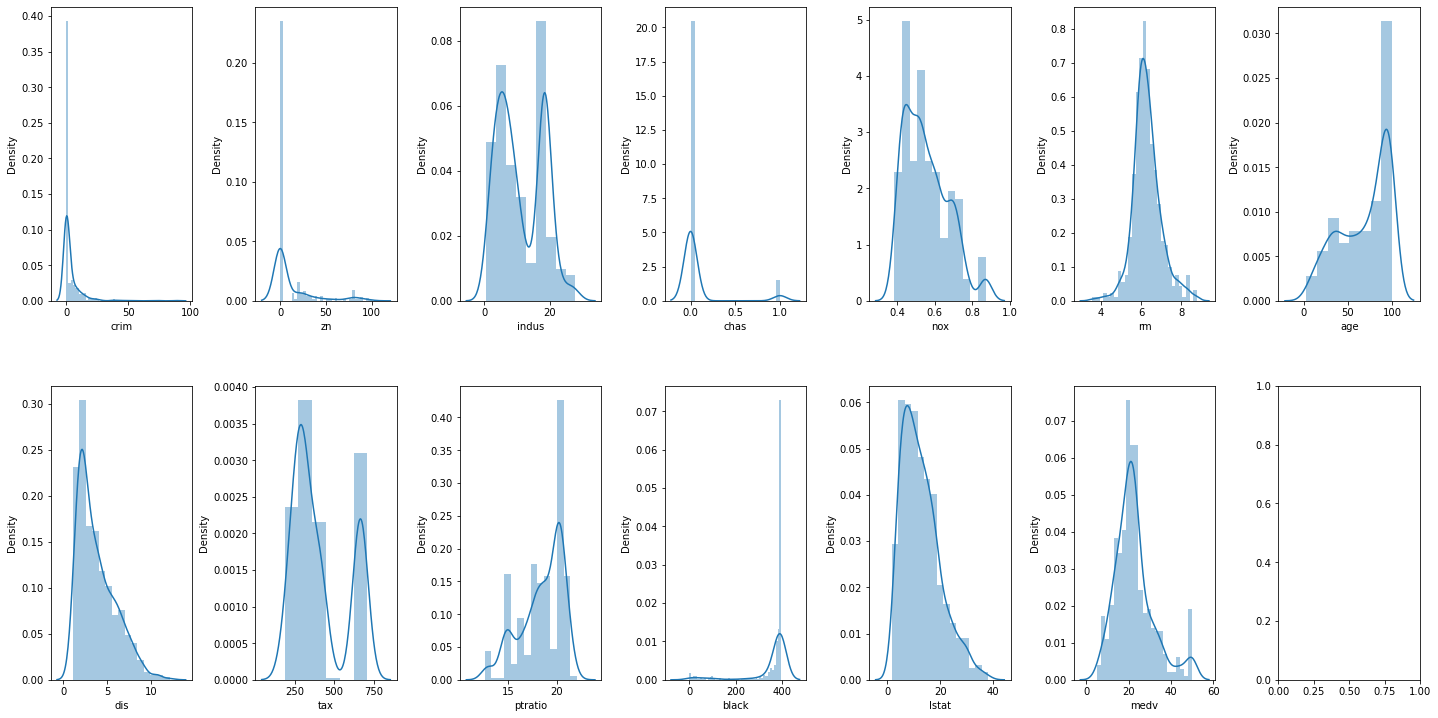

In [7]:
# visualize data use sns.distplot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.8, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='crim', ylabel='medv'>

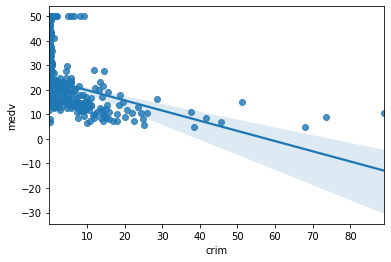

In [8]:
# visualize house median value by crime rate of the area
sns.regplot(x=df['crim'],y=df['medv'])

<AxesSubplot:xlabel='rm', ylabel='medv'>

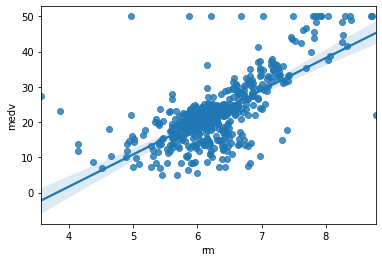

In [9]:
# visualize house median value by average number of rooms
sns.regplot(x=df['rm'],y=df['medv'])

In [10]:
# get x value
x=df.drop(columns=['medv'],axis=1)
x

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48


In [11]:
# get y value
y=df['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [12]:
# train_test_split to create 80% train and 20% test data 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [13]:
# create model use LinearRegression and predict test data
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
prediction

array([18.42914549, 16.94586739, 21.07157755, 30.85418605, 11.91592537,
       15.24265147, 25.09672384, 34.68772499, 20.92009605,  6.51393089,
       19.1380675 , 29.67973352, 32.91261571, 28.49707293, 20.76002441,
       23.11413416, 14.00539135, 20.89885708, 18.65275885, 35.50695992,
       30.66077753, 18.74520018, 33.17244464, 22.48780977, 36.54890865,
       16.58924472, 33.01671128, 27.69187152, 16.12222187, 11.61430944,
       10.0917428 , 31.65869744, 21.06375014,  7.27135724, 18.39263376,
       16.4722547 , 23.58727506, 24.90593014, 21.66982327, 16.19652517,
       31.27496806, 21.6806501 , 26.70948747, 31.62224956, 16.52177059,
       27.20062802, 19.69674656, 32.31193398, 18.73802639, 23.87135841,
       18.19426152, 34.32499039, 19.9632906 , 15.86941748, 26.39670457,
       16.28240548, 11.27072943, 17.4146952 , 18.62066171,  5.94827327,
       18.06239218, 24.75275334, 22.32192226, 17.36218522, 25.93842803,
       22.56129774, 32.33879672, 11.80604953, 29.23194856, 24.76

In [14]:
model.score(x_test,y_test)

0.520749780630582

In [15]:
# as accuracy_score use to classification model, can't be use to regression model, below will be error
# score=accuracy_score(y_test,prediction)
# score

In [16]:
# score the data use cross_val_score:
cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print("CV Score:%f" %cv_score)

# score the data use mean_squared_error:
mse_score=mean_squared_error(y_test,prediction)
print("MSE score:%f" %mse_score)

CV Score:35.581366
MSE score:40.999038


<AxesSubplot:title={'center':'Model Coefficients'}>

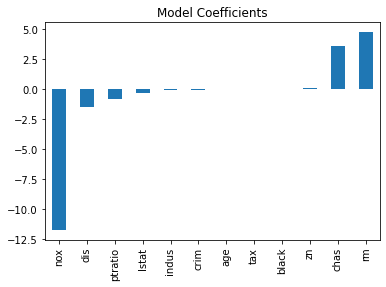

In [17]:
# visualize the data
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [18]:
# create model use DecisionTreeRegressor and predict test data
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)
prediction=model2.predict(x_test)
prediction

array([15.3, 18.9, 22.9, 35.1, 11.3, 13.3, 33.1, 34.9, 18.9, 15.3, 19.5,
       28.5, 37.3, 22. , 21.8, 22.7, 17.3, 20.3, 20.8, 42.3, 24.7, 22.5,
       30.5, 20. , 50. , 16.2, 32.4, 28.5, 13.4,  7.5, 11.9, 30.8, 21.7,
        7.2, 16.2, 17.9, 22.6, 25.2, 50. , 21.1, 35.2, 20.2, 22. , 33.2,
       19.1, 24.4, 18.9, 30.5, 24.5, 25. , 27.9, 34.6, 20.3, 22.7, 29. ,
       12.1,  9.7, 21.2, 22.2,  8.8, 20.4, 22.6, 19.9, 24.5, 20. , 22.7,
       10.4, 19.1, 32. , 24.4, 19.4, 13.3, 22. , 20.3, 11. ,  8.3, 13.5,
       19.9, 19.4, 16.1, 19.9, 20.5, 20.3, 19.5, 21.9, 13.1, 33.4, 23.3,
        5.6, 34.6,  7. , 23.2, 30.5,  7. , 19.2, 18.4, 24.6, 28.7, 33.4,
       20.1, 19.4, 22.9])

In [19]:
# score the data use cross_val_score:
cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print("CV Score:%f" %cv_score)

# score the data use mean_squared_error:
mse_score=mean_squared_error(y_test,prediction)
print("MSE score:%f" %mse_score)

CV Score:35.581366
MSE score:25.543137
